### Predicting the Vistors of the Upcoming Daejeon Science Festival Using previous Data

In [2]:
#시각화와 전처리 위한 패키지 로딩
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import numpy as np
import pandas as pd
import pandas_profiling as pp #데이터 전처리

In [6]:
# read in file
train = pd.read_csv('../data/Train_data_Update.csv')

In [7]:
train.head()

,Start_date,Year,Count,Days_Open,Avg_Count,News_Count,Start_date.1,End_date,Vis_change_rate,big_data_newsCount,prev_count,mid_count,after_count,Month,Day,WeekDay
0,2000-08-11,2000,188046,10,18804.60000,25,2000-08-11,2000-08-20,0.000000,94,54,26,15,8,11,4
1,2001-08-11,2001,245338,10,24533.80000,27,2001-08-11,2001-08-20,0.233523,82,39,28,16,8,11,5
2,2002-08-09,2002,209510,10,20951.00000,31,2002-08-09,2002-08-18,-0.171009,77,45,20,12,8,9,4
3,2003-08-07,2003,151235,11,13748.63636,47,2003-08-07,2003-08-17,-0.523860,68,27,27,14,8,7,3
4,2004-07-31,2004,126596,11,11508.72727,86,2004-07-31,2004-08-10,-0.194627,96,68,16,12,7,31,5


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 16 columns):
Start_date            22 non-null object
Year                  22 non-null int64
Count                 22 non-null int64
Days_Open             22 non-null int64
Avg_Count             22 non-null float64
News_Count            22 non-null int64
Start_date.1          22 non-null object
End_date              22 non-null object
Vis_change_rate       22 non-null float64
big_data_newsCount    22 non-null int64
prev_count            22 non-null int64
mid_count             22 non-null int64
after_count           22 non-null int64
Month                 22 non-null int64
Day                   22 non-null int64
WeekDay               22 non-null int64
dtypes: float64(2), int64(11), object(3)
memory usage: 2.8+ KB


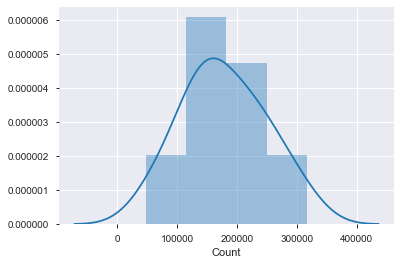

In [9]:
sns.distplot(train['Count'].astype(int))

In [11]:
train.shape

(22, 16)

In [12]:
pp.ProfileReport(train)

In [13]:
weather = pd.read_csv('../Data/날씨데이터.csv')

In [14]:
weather.head()

,Unnamed: 0,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃),최저초상온도(℃),상대습도(%) (관측),운량(할),일사(MJ/㎡),일조(hr) (관측),평균풍속(km/h),최대풍향풍속(km/h),최대순간풍향풍속(km/h),증발량(mm),강수량(mm),지면온도(℃)
0,2000-08-11,27.4,33.7,23.0,10.7,22.6,75.0,4.8,21.98,8.4,8.3,21.2,40.3,5.0,NaN,31.4
1,2000-08-12,27.9,33.2,23.0,10.7,21.9,75.0,4.8,25.16,11.9,10.1,27.7,44.3,5.0,NaN,31.2
2,2000-08-13,28.3,33.4,24.2,9.2,23.8,69.6,6.4,22.87,9.8,10.4,23.8,33.5,7.2,3.7,33.3
3,2000-08-14,26.9,31.7,23.7,8.0,23.1,73.8,4.6,14.50,5.8,9.0,22.0,34.6,4.5,0.2,29.1
4,2000-08-15,27.5,33.1,21.8,11.3,21.5,71.5,4.1,23.21,10.2,8.3,NaN,NaN,NaN,NaN,NaN


In [16]:
weather.columns = ['Year', '평균기온(℃)', '최고기온(℃)\n', '최저기온(℃)\n', '일교차(℃)',
       '최저초상온도(℃)', '상대습도(%) (관측)\n', '운량(할)', '일사(MJ/㎡)', '일조(hr) (관측)\n ',
       '평균풍속(km/h)\n\n', '최대풍향풍속(km/h)\n', '최대순간풍향풍속(km/h)\n', '증발량(mm)\n',
       '강수량(mm)\n', '지면온도(℃)']

In [21]:
g = [x[0:4] for x in weather.Year]
weather.Year = g
weather.head()

,Year,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃),최저초상온도(℃),상대습도(%) (관측),운량(할),일사(MJ/㎡),일조(hr) (관측),평균풍속(km/h),최대풍향풍속(km/h),최대순간풍향풍속(km/h),증발량(mm),강수량(mm),지면온도(℃)
0,2000,27.4,33.7,23.0,10.7,22.6,75.0,4.8,21.98,8.4,8.3,21.2,40.3,5.0,NaN,31.4
1,2000,27.9,33.2,23.0,10.7,21.9,75.0,4.8,25.16,11.9,10.1,27.7,44.3,5.0,NaN,31.2
2,2000,28.3,33.4,24.2,9.2,23.8,69.6,6.4,22.87,9.8,10.4,23.8,33.5,7.2,3.7,33.3
3,2000,26.9,31.7,23.7,8.0,23.1,73.8,4.6,14.50,5.8,9.0,22.0,34.6,4.5,0.2,29.1
4,2000,27.5,33.1,21.8,11.3,21.5,71.5,4.1,23.21,10.2,8.3,NaN,NaN,NaN,NaN,NaN


In [24]:
weather_mean = weather.groupby('Year').mean()

In [36]:
weather_mean

,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃),최저초상온도(℃),상대습도(%) (관측),운량(할),일사(MJ/㎡),일조(hr) (관측),평균풍속(km/h),최대풍향풍속(km/h),최대순간풍향풍속(km/h),증발량(mm),강수량(mm),지면온도(℃)
Year,,,,,,,,,,,,,,,
2000,26.980000,32.020000,23.360000,8.710000,22.690000,75.980000,6.570000,16.881000,5.810000,11.34,23.675000,38.175,5.425000,1.950000,31.250000
2001,25.950000,30.450000,22.150000,8.300000,20.940000,72.090000,5.410000,15.950000,5.710000,9.77,21.270000,34.300,4.030000,10.020000,28.110000
2002,22.580000,25.220000,20.850000,4.370000,20.050000,87.600000,9.180000,7.779000,0.470000,6.00,15.300000,23.700,1.980000,12.755556,25.250000
2003,23.772727,27.700000,20.554545,7.145455,18.945455,74.890909,6.027273,15.190909,4.836364,8.50,19.245455,32.100,3.145455,5.280000,26.218182
2004,28.227273,33.327273,24.363636,10.500000,21.600000,61.800000,1.500000,23.060000,11.700000,6.10,16.900000,29.900,6.900000,NaN,34.600000
2005,25.840000,29.480000,23.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,26.740000,31.530000,23.070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,27.520000,32.380000,23.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,18.233333,24.666667,10.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
weather_csv = weather_mean.iloc[:,0:3]

In [40]:
weather_csv.to_csv("weather_mean.csv")

In [7]:
weather10 = pd.read_csv("../Data/10개년 날씨.csv")

In [10]:
weather10.to_csv("10 year weather.csv")

In [15]:
weather10.columns = ['Year', '평균기온(℃)', '최고기온(℃)\n', '최저기온(℃)\n', '일교차(℃)',
       '최저초상온도(℃)', '상대습도(%) (관측)\n', '운량(할)', '일사(MJ/㎡)', '일조(hr) (관측)\n ',
       '평균풍속(km/h)\n\n', '최대풍향풍속(km/h)\n', '최대순간풍향풍속(km/h)\n', '증발량(mm)\n',
       '강수량(mm)\n', '지면온도(℃)']

In [17]:
g = [x[0:4] for x in weather10.Year]
weather10.Year = g
weather10.head()

,Year,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃),최저초상온도(℃),상대습도(%) (관측),운량(할),일사(MJ/㎡),일조(hr) (관측),평균풍속(km/h),최대풍향풍속(km/h),최대순간풍향풍속(km/h),증발량(mm),강수량(mm),지면온도(℃)
0,2000,27.4,33.7,23.0,10.7,22.6,75.0,4.8,21.98,8.4,8.3,21.2,40.3,5.0,NaN,31.4
1,2000,27.9,33.2,23.0,10.7,21.9,75.0,4.8,25.16,11.9,10.1,27.7,44.3,5.0,NaN,31.2
2,2000,28.3,33.4,24.2,9.2,23.8,69.6,6.4,22.87,9.8,10.4,23.8,33.5,7.2,3.7,33.3
3,2000,26.9,31.7,23.7,8.0,23.1,73.8,4.6,14.50,5.8,9.0,22.0,34.6,4.5,0.2,29.1
4,2000,27.5,33.1,21.8,11.3,21.5,71.5,4.1,23.21,10.2,8.3,NaN,NaN,NaN,NaN,NaN


In [19]:
weather10.groupby(["Year"]).mean()

,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃),최저초상온도(℃),상대습도(%) (관측),운량(할),일사(MJ/㎡),일조(hr) (관측),평균풍속(km/h),최대풍향풍속(km/h),최대순간풍향풍속(km/h),증발량(mm),강수량(mm),지면온도(℃)
Year,,,,,,,,,,,,,,,
2000,26.980000,32.020000,23.360000,8.710000,22.690000,75.980000,6.570000,16.881000,5.810000,11.340000,23.675000,38.175000,5.425000,1.950000,31.250000
2001,25.950000,30.450000,22.150000,8.300000,20.940000,72.090000,5.410000,15.950000,5.710000,9.770000,21.270000,34.300000,4.030000,10.020000,28.110000
2002,22.580000,25.220000,20.850000,4.370000,20.050000,87.600000,9.180000,7.779000,0.470000,6.000000,15.300000,23.700000,1.980000,12.755556,25.250000
2003,23.772727,27.700000,20.554545,7.145455,18.945455,74.890909,6.027273,15.190909,4.836364,8.500000,19.245455,32.100000,3.145455,5.280000,26.218182
2004,28.227273,33.327273,24.363636,8.963636,22.054545,69.072727,4.036364,19.643636,7.809091,5.472727,16.581818,28.890909,5.263636,13.500000,32.318182
2005,25.840000,29.480000,23.150000,6.830000,22.780000,79.170000,6.670000,14.064000,4.340000,4.360000,15.840000,28.460000,2.780000,34.900000,28.410000
2006,26.740000,31.530000,23.070000,8.460000,22.090000,71.170000,5.470000,17.689000,5.550000,5.800000,12.970000,24.490000,4.740000,0.816667,31.590000
2007,27.520000,32.380000,23.700000,8.680000,22.800000,73.440000,5.220000,18.866000,6.280000,4.740000,12.380000,22.180000,4.540000,3.500000,29.440000
2008,18.233333,24.666667,10.900000,13.766667,8.866667,35.766667,5.000000,18.526667,6.266667,11.266667,24.966667,39.866667,5.000000,NaN,19.900000
